In [1]:
import sys
import os
import glob

In [2]:
sys.path.append(os.path.realpath('..'))

In [3]:
import rainscanner

In [12]:
fn_list = glob.glob('/data/rawdata/geigersau/rainradar/raw_data/2015/2015-08/*.tgz')

In [18]:
ds = rainscanner.io.read_azi_tgz_files_to_xarray_dataset(fn_list=fn_list[0:10], elevation=3)

Reading /data/rawdata/geigersau/rainradar/raw_data/2015/2015-08/2015-08-01.tgz: 288it [00:00, 375.15it/s]
Reading /data/rawdata/geigersau/rainradar/raw_data/2015/2015-08/2015-08-02.tgz: 288it [00:00, 393.54it/s]
Reading /data/rawdata/geigersau/rainradar/raw_data/2015/2015-08/2015-08-03.tgz: 288it [00:00, 414.71it/s]
Reading /data/rawdata/geigersau/rainradar/raw_data/2015/2015-08/2015-08-04.tgz: 288it [00:00, 405.00it/s]
Reading /data/rawdata/geigersau/rainradar/raw_data/2015/2015-08/2015-08-05.tgz: 288it [00:00, 408.78it/s]
Reading /data/rawdata/geigersau/rainradar/raw_data/2015/2015-08/2015-08-06.tgz: 288it [00:00, 445.51it/s]
Reading /data/rawdata/geigersau/rainradar/raw_data/2015/2015-08/2015-08-07.tgz: 288it [00:00, 433.97it/s]
Reading /data/rawdata/geigersau/rainradar/raw_data/2015/2015-08/2015-08-08.tgz: 288it [00:00, 418.21it/s]
Reading /data/rawdata/geigersau/rainradar/raw_data/2015/2015-08/2015-08-09.tgz: 288it [00:00, 380.03it/s]
Reading /data/rawdata/geigersau/rainradar/raw_

In [20]:
ds

<xarray.Dataset>
Dimensions:    (az: 180, r: 500, time: 2880)
Coordinates:
  * r          (r) float64 0.0 100.0 200.0 300.0 ... 4.97e+04 4.98e+04 4.99e+04
  * az         (az) float64 0.0 2.0 3.999 5.999 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 2015-07-31T23:59:54 ... 2015-08-10T23:54:55
    latitude   (az, r) float64 47.73 47.73 47.73 47.73 ... 48.17 48.17 48.18
    longitude  (az, r) float64 11.03 11.03 11.03 11.03 ... 11.01 11.01 11.01
Data variables:
    ZH_raw     (time, az, r) float64 37.95 28.53 51.84 ... -31.5 -31.5 -31.5

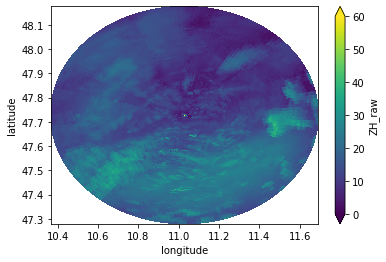

In [26]:
ds.ZH_raw.max(dim='time').plot(x='longitude', y='latitude', vmin=0, vmax=60)

In [30]:
ds.to_netcdf('rainscanner_example_data.nc', encoding={'ZH_raw': {'zlib': True}})

In [32]:
ls -trlh

total 80M
-rw-r--r-- 1 chwala-c Domain Users  80M Feb 15 22:38 rainscanner_example_data.nc
-rw-r--r-- 1 chwala-c Domain Users 117K Feb 15 22:40 parse_rainbow_tgz_files_to_netcdf.ipynb
